<a href="https://colab.research.google.com/github/YangxuanWu/Python/blob/master/Python/0620_overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
import pandas as pd   
mydata_txt = pd.read_csv('C:/Python/ashleymad.txt',sep = '\t',encoding = 'utf-8', names=['Email'])
mydata_txt

mydata_txt.shape
mydata_txt.info()
mydata_txt.dtypes
mydata_txt.isnull()
mydata_txt.values

alist = ['gmail.com']
mydata_txt['Email'].isin(alist) 
mydata_txt[mydata_txt['Email'].isin(alist)]

alist = ['ilstu.edu']
mydata_txt['Email'].isin(alist) 
mydata_txt[mydata_txt['Email'].isin(alist)]

alist = ['statefarm.com']
mydata_txt['Email'].isin(alist) 
a = mydata_txt[mydata_txt['Email'].isin(alist)]
a.shape

a = mydata_txt.apply(pd.value_counts)
mydata_txt.apply(pd.value_counts).to_csv("C:/Python/ashleymad.csv") 



from pandas import DataFrame
df = mydata_txt
print (df)

Count = df.apply(pd.value_counts) 
Count

a = df['Email'].values.tolist()
str1 = df['Email'].values.tolist()

#不能运行，放在这存一下，方便复习。

In [1]:
#数据集中信息分为两部分，一部分是和预测未来数据有关的数据，另一部分是无关的，两者地位是平等的。用来作为预测的评判标准越不精确，
#表明噪声数据就越多，需要忽略掉的数据也就越多，而关键就是究竟那一部分应该忽略掉。
#所以把一个学习算法对噪声的削减能力就叫做它的鲁棒性。我们需要的就是鲁棒性很强的学习算法
#我能理解的就是数据少特征多就发生overfitting。参数少，训练数据过大，就会发生underfitting

import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.4526 - acc: 0.8237 - val_loss: 0.3356 - val_acc: 0.8803
Epoch 2/20
25000/25000 [==============================] - 3s 104us/step - loss: 0.2541 - acc: 0.9095 - val_loss: 0.2824 - val_acc: 0.8890
Epoch 3/20
25000/25000 [==============================] - 3s 105us/step - loss: 0.1987 - acc: 0.9288 - val_loss: 0.2817 - val_acc: 0.8872
Epoch 4/20
25000/25000 [==============================] - 3s 104us/step - loss: 0.1672 - acc: 0.9398 - val_loss: 0.2958 - val_acc: 0.8838
Epoch 5/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.1418 - acc: 0.9500 - val_loss: 0.3245 - val_acc: 0.8760
Epoch 6/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.1261 - acc: 0.9568 - val_loss: 0.3373 - val_acc: 0.8748
Epoch 7/20
25000/25000 [==============================] - 3s 104us/step - loss: 0.1098 - acc: 0.9629 - val_loss: 0.3608 - 

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 105us/step - loss: 0.5811 - acc: 0.7564 - val_loss: 0.4940 - val_acc: 0.8627
Epoch 2/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.4035 - acc: 0.8870 - val_loss: 0.3781 - val_acc: 0.8787
Epoch 3/20
25000/25000 [==============================] - 3s 104us/step - loss: 0.3002 - acc: 0.9094 - val_loss: 0.3203 - val_acc: 0.8837
Epoch 4/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.2426 - acc: 0.9217 - val_loss: 0.2902 - val_acc: 0.8901
Epoch 5/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.2059 - acc: 0.9321 - val_loss: 0.2837 - val_acc: 0.8875
Epoch 6/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.1816 - acc: 0.9384 - val_loss: 0.2845 - val_acc: 0.8870
Epoch 7/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.1630 - acc: 0.9452 - val_loss: 0.2863 - 

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

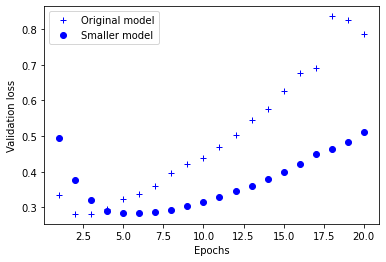

In [8]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [9]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 12s 486us/step - loss: 0.4582 - acc: 0.8004 - val_loss: 0.4310 - val_acc: 0.8123
Epoch 2/20
25000/25000 [==============================] - 12s 490us/step - loss: 0.2221 - acc: 0.9117 - val_loss: 0.2897 - val_acc: 0.8858
Epoch 3/20
25000/25000 [==============================] - 12s 491us/step - loss: 0.1336 - acc: 0.9504 - val_loss: 0.3351 - val_acc: 0.8852
Epoch 4/20
25000/25000 [==============================] - 12s 497us/step - loss: 0.0643 - acc: 0.9811 - val_loss: 0.6814 - val_acc: 0.8376
Epoch 5/20
25000/25000 [==============================] - 12s 496us/step - loss: 0.0776 - acc: 0.9873 - val_loss: 0.5123 - val_acc: 0.8792
Epoch 6/20
25000/25000 [==============================] - 12s 490us/step - loss: 0.0830 - acc: 0.9879 - val_loss: 0.4708 - val_acc: 0.8745
Epoch 7/20
25000/25000 [==============================] - 12s 488us/step - loss: 0.0018 - acc: 0.9999 - val_loss: 0.

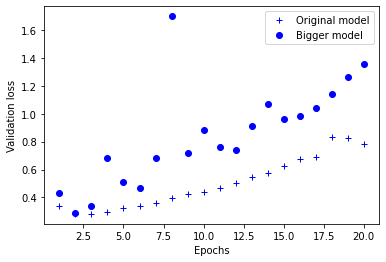

In [11]:
#点表示大网络的验证损失值，十字表示初始网络。
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

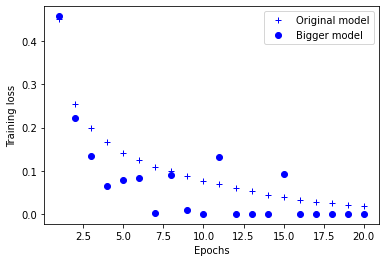

In [12]:

original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [16]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [15]:

l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 127us/step - loss: 0.5185 - acc: 0.8174 - val_loss: 0.3954 - val_acc: 0.8791
Epoch 2/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.3278 - acc: 0.9031 - val_loss: 0.3390 - val_acc: 0.8879
Epoch 3/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.2752 - acc: 0.9198 - val_loss: 0.3311 - val_acc: 0.8864
Epoch 4/20
25000/25000 [==============================] - 3s 121us/step - loss: 0.2512 - acc: 0.9274 - val_loss: 0.3357 - val_acc: 0.8847
Epoch 5/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.2373 - acc: 0.9347 - val_loss: 0.3390 - val_acc: 0.8850
Epoch 6/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.2281 - acc: 0.9365 - val_loss: 0.3501 - val_acc: 0.8809
Epoch 7/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.2222 - acc: 0.9391 - val_loss: 0.3535 - 

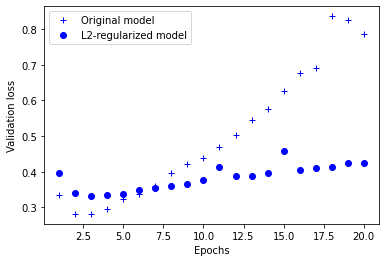

In [23]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [25]:

from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

In [27]:

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [28]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 156us/step - loss: 0.5703 - acc: 0.7053 - val_loss: 0.4113 - val_acc: 0.8696
Epoch 2/20
25000/25000 [==============================] - 3s 116us/step - loss: 0.4156 - acc: 0.8305 - val_loss: 0.3256 - val_acc: 0.8800
Epoch 3/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.3393 - acc: 0.8749 - val_loss: 0.2958 - val_acc: 0.8826
Epoch 4/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.2892 - acc: 0.8994 - val_loss: 0.2854 - val_acc: 0.8872
Epoch 5/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.2543 - acc: 0.9125 - val_loss: 0.2840 - val_acc: 0.8885
Epoch 6/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.2256 - acc: 0.9242 - val_loss: 0.3061 - val_acc: 0.8834
Epoch 7/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.2048 - acc: 0.9308 - val_loss: 0.3049 - 

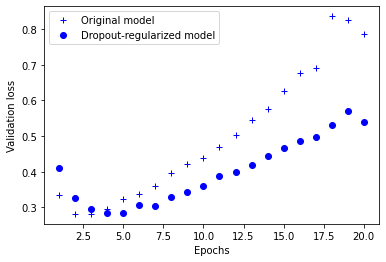

In [29]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()